In [12]:
from time import time
from numpy.random import RandomState
import pylab as pl
import numpy as np
#import matplotlib as pl
from sklearn.decomposition import NMF

from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition

# - EXTRACTION DE CARACTÉRISTIQUES DE VISAGES -

In [17]:
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# Load faces data
dataset = fetch_olivetti_faces(data_home='c:/tmp/',shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0, dtype=np.float64)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


In [18]:

def plot_gallery(title, images):
    pl.figure(figsize=(2. * n_col, 2.26 * n_row))
    pl.suptitle(title, size=16)
    for i, comp in enumerate(images):
        pl.subplot(n_row, n_col, i + 1)
        
        comp = comp.reshape(image_shape)
        vmax = comp.max()
        vmin = comp.min()
        dmy = np.nonzero(comp<0)
        if len(dmy[0])>0:
            yz, xz = dmy            
        comp[comp<0] = 0

        pl.imshow(comp, cmap=pl.cm.gray, vmax=vmax, vmin=vmin)
        #print "vmax: %f, vmin: %f" % (vmax, vmin)
        #print comp
        
        if len(dmy[0])>0:
            pl.plot( xz, yz, 'r,')
            print(len(dmy[0]), "negative-valued pixels")
                  
        pl.xticks(())
        pl.yticks(())
        
    pl.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

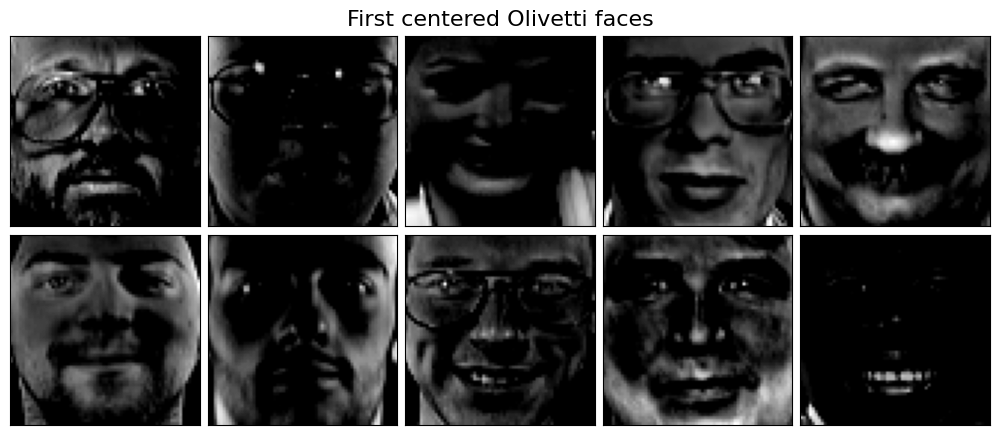

In [20]:
# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

In [14]:
estimators = [
    ('pca', 'Eigenfaces - PCA',
     decomposition.PCA(n_components=n_components, whiten=True),
     True),

    ('nmf', 'Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, tol=1e-6, 
                        max_iter=1000), 
     False)
]

Extracting the top 10 Eigenfaces - PCA...
done in 0.175s
3998 negative-valued pixels
2078 negative-valued pixels
1967 negative-valued pixels
1862 negative-valued pixels
2261 negative-valued pixels
1924 negative-valued pixels
1951 negative-valued pixels
1884 negative-valued pixels
2221 negative-valued pixels
2128 negative-valued pixels
Extracting the top 10 Non-negative components - NMF...


/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


done in 2.382s


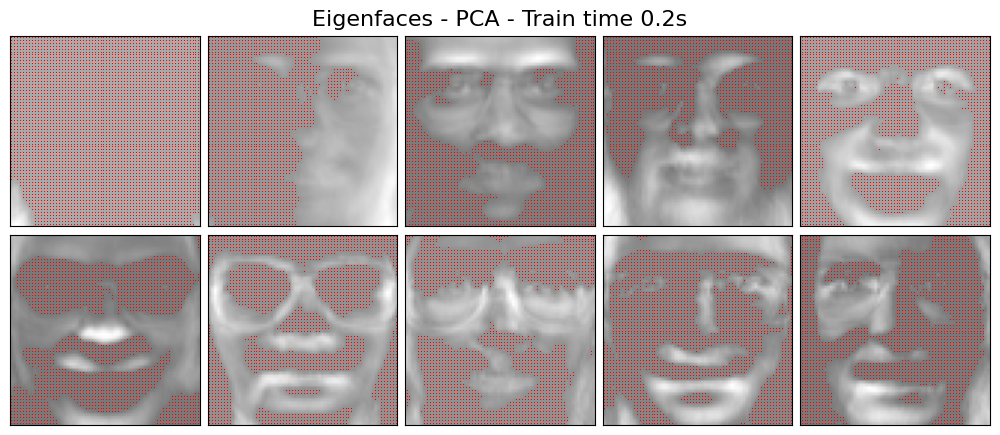

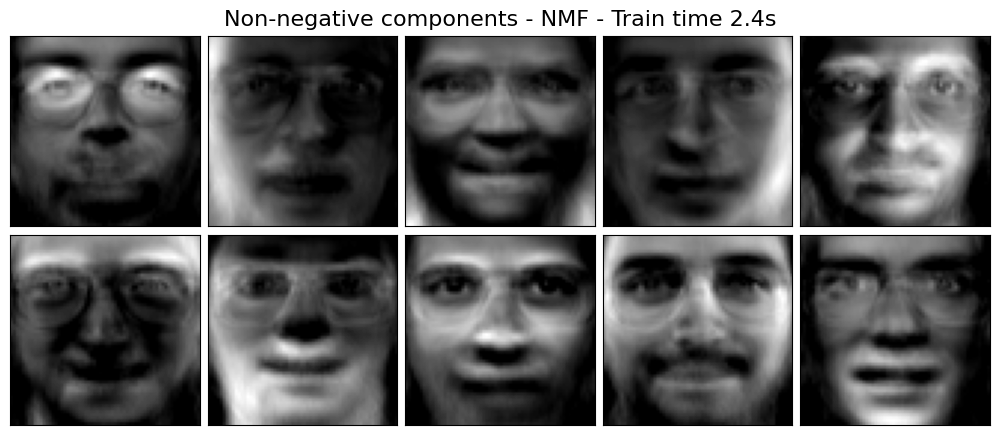

In [16]:
labels = dataset.target
X = faces
X_ = faces_centered

for shortname, name, estimator, center in estimators:
    if shortname != 'nmf': continue
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
 
    data = X
    if center:
        data = X_
        
    data = estimator.fit_transform(data) 

    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
 
    components_ = estimator.components_
    
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Assurez-vous que 'X_pca' et 'X_nmf' sont les données transformées obtenues après application de PCA et NMF respectivement
# 'labels' contient les étiquettes de classe pour chaque observation

# Initialisation de la LDA
lda = LDA()

# Configuration de la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluation de la PCA
scores_pca = cross_val_score(lda, X_pca, labels, cv=cv)
print("Précision moyenne PCA: %0.2f (+/- %0.2f)" % (scores_pca.mean(), scores_pca.std() * 2))

# Evaluation de la NMF
scores_nmf = cross_val_score(lda, X_nmf, labels, cv=cv)
print("Précision moyenne NMF: %0.2f (+/- %0.2f)" % (scores_nmf.mean(), scores_nmf.std() * 2))


In [54]:
from sklearn.decomposition import PCA, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

# Chargement des données
dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
X = dataset.data
labels = dataset.target

# Nombre de composantes à extraire
n_components_list = range(5,50,5)

# Initialisation de la LDA
lda = LDA()

# Configuration de la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3

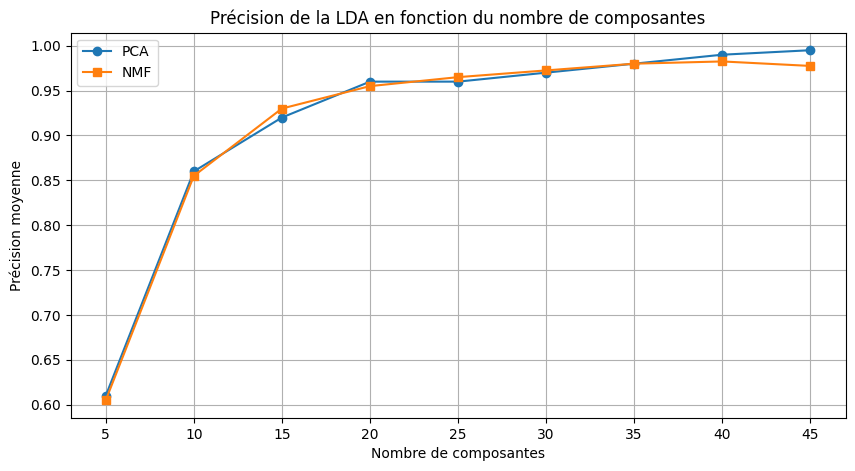

In [55]:
scores_pca = []
scores_nmf = []

# Boucle sur le nombre de composantes
for n_components in n_components_list:
    # PCA
    pca = PCA(n_components=n_components, whiten=True)
    X_pca = pca.fit_transform(X)
    score_pca = cross_val_score(lda, X_pca, labels, cv=cv).mean()
    scores_pca.append(score_pca)

    # NMF
    nmf = NMF(n_components=n_components, init='nndsvda', tol=1e-6, max_iter=1000)
    X_nmf = nmf.fit_transform(X)
    score_nmf = cross_val_score(lda, X_nmf, labels, cv=cv).mean()
    scores_nmf.append(score_nmf)

# Tracé des graphiques
pl.figure(figsize=(10, 5))
pl.plot(n_components_list, scores_pca, label='PCA', marker='o')
pl.plot(n_components_list, scores_nmf, label='NMF', marker='s')
pl.xlabel('Nombre de composantes')
pl.ylabel('Précision moyenne')
pl.title('Précision de la LDA en fonction du nombre de composantes')
pl.legend()
pl.grid(True)
pl.show()


# - EXTRACTION DE THÈMES À PARTIR DE TEXTES -

In [31]:
from time import time
from sklearn.feature_extraction import text
from sklearn import decomposition
from sklearn import datasets

In [32]:
n_samples = 1000
n_features = 900
n_topics = 4
n_top_words = 20

# Load the 20 newsgroups dataset and vectorize it using the most common word
# frequency with TF-IDF weighting (without top 5% stop words)

t0 = time()

In [33]:
# Load some categories from the training set
categories = ['rec.sport.baseball','comp.graphics', 'comp.sys.mac.hardware',
              'talk.religion.misc']

print("Loading dataset and extracting TF-IDF features...")
dataset = datasets.fetch_20newsgroups(data_home='d:/data/text/', shuffle=True,
                                      categories=categories, random_state=1)

Loading dataset and extracting TF-IDF features...


In [34]:
vectorizer = text.CountVectorizer(max_df=0.95, max_features=n_features, stop_words='english')
counts = vectorizer.fit_transform(dataset.data[:n_samples])
tfidf = text.TfidfTransformer().fit_transform(counts)
print("done in %0.3fs." % (time() - t0))

done in 2.649s.


In [35]:
# Fit the NMF model
print("Fitting the NMF model on with n_samples=%d and n_features=%d..." % (n_samples, n_features))
nmf = decomposition.NMF(n_components=n_topics).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

Fitting the NMF model on with n_samples=1000 and n_features=900...
done in 3.535s.


In [37]:
# Inverse the vectorizer vocabulary to be able
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf.components_):
    print( "Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic #0:
edu year article team baseball cs players writes game university runs host nntp posting jewish good hit season games win
Topic #1:
graphics files file uk thanks ac 3d program package help ca image windows university computer need format posting use com
Topic #2:
com god jesus sandvik people christian writes bible don kent christians brian netcom koresh article life said newton just apple
Topic #3:
mac apple edu drive scsi quadra monitor problem video centris duo se problems card power drives software internal disk ram


NMF(init='nndsvda', max_iter=1000, n_components=45, tol=1e-06)

# - SÉPARATION DE SOURCES AUDIO PAR ICA -

In [57]:
import pylab as pl
import numpy as np
import wave
from sklearn import decomposition
import soundfile as sf

In [48]:
def wavread(filename):
    wf = wave.open(filename, 'rb')
    s = np.frombuffer(wf.readframes(wf.getnframes()), dtype=np.int16)
    wf.close()
    return s
    
def wavwrite(filename, s, nchannels=1, sampwidth=2, samplerate=32000):
    s = s / max(abs(s)) * 2**14  # Normalisation
    s = s.astype(np.int16)
    sf.write(filename, s, samplerate)

In [49]:
s1 = wavread('./snd/es02.wav')
s2 = wavread('./snd/si01.wav')

In [58]:
nsmp = min(len(s1), len(s2))
s1 = s1[:nsmp]
s2 = s2[:nsmp]
S = np.c_[s1, s2]
# Mixing matrix 
A = np.array([[0.6, 0.5], [0.4, 0.5]])
# Do the mix
X = S.dot(A)
# Write mix file
x = np.zeros(2 * nsmp)
x[::2] = X[:,0]
x[1::2] = X[:,1]
wavwrite('./snd/mix.wav', x, nchannels=2)

## -- ICA source separation -----------------------------------------------------


In [59]:
ica = decomposition.FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstituer les signaux
A_ = ica.mixing_  # Obtenir la matrice de mélange estimée

##  Visualise sources

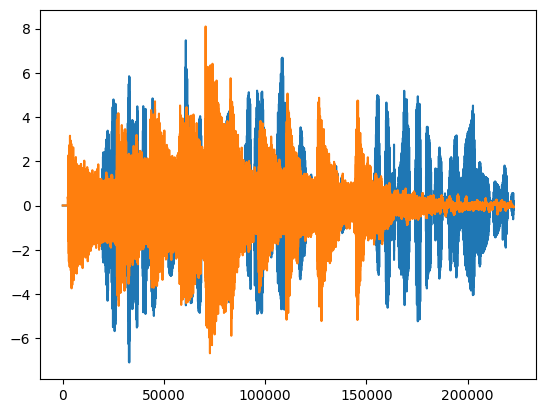

In [60]:
pl.figure()
for sig in S_.T:
    pl.plot(sig)

## Write audio sources

In [61]:
for i, signal in enumerate(S_.T):
    wavwrite(f'./snd/source_separee_{i+1}.wav', signal, nchannels=1, samplerate=32000)

print("ICA source separation completed and files saved.")

ICA source separation completed and files saved.


In [46]:
#!pip install soundfile



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.9 MB/s eta 0:00:0000:010:01
